# VacationPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import plotly.express as px


# Import API key
from api_keys import g_key
from api_keys import mapbox_token

px.set_mapbox_access_token(mapbox_token)

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [2]:
df = pd.read_csv("cities.csv")
df.head()

,name,lat,lng,max_temp_f,humidity,cloudiness,windspeed,country,date
0,Pangnirtung,66.15,-65.71,34.63,84,100,6.06,CA,1601084642
1,Kathmandu,27.72,85.32,68.00,100,75,2.24,NP,1601084501
2,Taltal,-25.40,-70.48,56.26,74,36,3.24,CL,1601084642
3,Karratha,-20.74,116.85,77.68,36,98,14.83,AU,1601084643
4,Atar,20.52,-13.05,92.34,25,0,7.09,MR,1601084643


### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [18]:
# Ideal city
#Temp <85 and >70
#Wind < 15
# Cloudy is < 10

hi_temps = df[df["max_temp_f"] > 85].index
low_temps = df[df["max_temp_f"] < 70].index
high_winds = df[df["windspeed"] > 15].index
cloudy = df[df["cloudiness"] > 0].index

df.drop(hi_temps, inplace=True)
df.drop(low_temps, inplace=True)
df.drop(high_winds, inplace=True)
df.drop(cloudy, inplace=True)
df

,name,lat,lng,max_temp_f,humidity,cloudiness,windspeed,country,date,lat_lng
29,Tiznit Province,30.0,-10.0,77.16,40,0,3.22,MA,1601084649,"29.58,-9.5"
87,Carnarvon,-25.0,114.0,71.60,40,0,13.87,AU,1601084662,"-24.87,113.63"
91,Rosetta,31.0,30.0,77.00,73,0,5.82,EG,1601084663,"31.4,30.42"
103,Umluj,25.0,37.0,84.27,48,0,9.55,SA,1601084666,"25.02,37.27"
105,Pitimbu,-7.0,-35.0,71.60,88,0,4.70,BR,1601084666,"-7.47,-34.81"
110,Turbat,26.0,63.0,75.25,53,0,2.57,PK,1601084668,"26.0,63.04"
118,Caravelas,-18.0,-39.0,71.46,86,0,4.79,BR,1601084623,"-17.71,-39.25"
126,Marzuq,14.0,46.0,75.29,45,0,2.98,YE,1601084672,"14.4,46.47"
131,Agadez,20.0,10.0,80.89,16,0,9.17,NE,1601084673,"19.75,10.25"
146,Feicheng,35.0,118.0,71.46,63,0,7.09,CN,1601084677,"35.26,117.97"


### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [19]:
#create lat/lng string for API calls and add to df
df["lat_lng"] = df["lat"].astype(str) + "," + df["lng"].astype(str)

#create list to iterate over
lat_lng_list = df["lat_lng"].tolist()

In [20]:
hotels = requests.get("https://maps.googleapis.com/maps/api/place/nearbysearch/json", params={
    "key": g_key,
    "location": lat_lng_list,
    "radius": 50000,
    "keyword": "hotel"
}).json()

In [21]:
hotels["results"][1]

{'business_status': 'OPERATIONAL',
 'geometry': {'location': {'lat': 30.3970176, 'lng': -9.5965533},
  'viewport': {'northeast': {'lat': 30.39837157989272,
    'lng': -9.595196070107276},
   'southwest': {'lat': 30.39567192010728, 'lng': -9.59789572989272}}},
 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/lodging-71.png',
 'name': 'Iberostar Founty Beach',
 'opening_hours': {'open_now': True},
 'photos': [{'height': 1253,
   'html_attributions': ['<a href="https://maps.google.com/maps/contrib/117266401367782358727">Iberostar Founty Beach</a>'],
   'photo_reference': 'CmRaAAAAJtF828UUEr_wakdKIdIkIQGmysWHxH_pY9XtT_FnCh7OEumzICg_7yavcnM0Vcq44Rp6fqKvnZu26l69TylpDwh41rtSG-IxY6UDjdEGdzqRwf-oWXuG_edvJiYy-3RXEhCuSdx9Ym_Q7zPfBO4ZL9glGhQOZIR528c7M4GyQtL1Ih01RlBTLA',
   'width': 1874}],
 'place_id': 'ChIJmw7r9wK3sw0RQaioZKR25ts',
 'plus_code': {'compound_code': '9CW3+R9 Agadir, Morocco',
  'global_code': '8C2G9CW3+R9'},
 'rating': 4.6,
 'reference': 'ChIJmw7r9wK3sw0RQaioZKR25ts',
 's

In [22]:
#define function for extracting data
def extract_data(data):
    data = data["results"][0]
    return {
        "Hotel Name" : data["name"],
        "Lat" : data["geometry"]["location"]["lat"],
        "Lng" : data["geometry"]["location"]["lng"]
    }

In [23]:
#request data from Google Places api with api calls

hotel_results = []

#set beginning print statments for output
print("Beginning Data Retrieval")
print("-" * 25)

#set up record counter for output
record_counter = 1

#create for loop to loop over random city list
for coords in lat_lng_list:
    
    #set up request and include try/except
    try:
        print(f"Processing Record {record_counter} | {coords}")
        
        record_counter += 1
        
        data = requests.get("https://maps.googleapis.com/maps/api/place/nearbysearch/json", params={
            "key": g_key,
            "location": coords,
            "radius": 50000,
            "keyword": "hotel"
        }).json()
    
        hotel_result = extract_data(data)
    
        hotel_results.append(hotel_result)
        
    except:
        print("No hotel found. Skipping ...")
        pass
    
print("-" * 25)
print("Data Retrieval Complete")
print("-" * 25)

Beginning Data Retrieval
-------------------------
Processing Record 1 | 30.0,-10.0
Processing Record 2 | -25.0,114.0
Processing Record 3 | 31.0,30.0
Processing Record 4 | 25.0,37.0
Processing Record 5 | -7.0,-35.0
Processing Record 6 | 26.0,63.0
Processing Record 7 | -18.0,-39.0
Processing Record 8 | 14.0,46.0
Processing Record 9 | 20.0,10.0
No hotel found. Skipping ...
Processing Record 10 | 35.0,118.0
Processing Record 11 | 2.0,40.0
Processing Record 12 | 37.0,122.0
Processing Record 13 | -19.0,-48.0
Processing Record 14 | 27.0,31.0
Processing Record 15 | -21.0,-56.0
Processing Record 16 | 23.0,60.0
Processing Record 17 | 25.0,63.0
Processing Record 18 | -27.0,153.0
Processing Record 19 | 33.0,74.0
Processing Record 20 | 31.0,20.0
Processing Record 21 | 4.0,42.0
Processing Record 22 | 12.0,7.0
Processing Record 23 | -21.0,27.0
Processing Record 24 | -23.0,-55.0
Processing Record 25 | 36.0,30.0
Processing Record 26 | 19.0,37.0
Processing Record 27 | -28.0,153.0
Processing Record 28 |

In [24]:
hotel_df = pd.DataFrame(hotel_results)

In [25]:
hotel_df

,Hotel Name,Lat,Lng
0,Sofitel Agadir Thalassa sea & spa,30.391594,-9.598151
1,Carnarvon Motel,-24.880743,113.653285
2,Iberotel Borg El Arab,30.933228,29.474882
3,HP Red Sea Hotel,25.032590,37.257006
4,Solar Tambaú,-7.118989,-34.824536
5,Shapur Hotel,26.005594,63.058274
6,Hotel Marina Porto Abrolhos,-17.726083,-39.178418
7,فندق المدينه,13.882158,45.865266
8,Pullman Linyi Lushang,35.074820,118.357027
9,Wajir Palace Hotel,1.742667,40.074269


In [ ]:
# Add marker layer ontop of heat map


# Display figure


In [26]:
#round lat and lng columns in both dataframes in order to merge for plotting
df = df.round({'lat': 0, 'lng': 0})
hotel_df = hotel_df.round({'Lat': 0, 'Lng': 0})

In [27]:
#merge dataframes on lat and lng columns for plotting
merged_df = pd.merge(hotel_df, df, how="left", left_on=["Lat", "Lng"], right_on=["lat", "lng"])
merged_df

,Hotel Name,Lat,Lng,name,lat,lng,max_temp_f,humidity,cloudiness,windspeed,country,date,lat_lng
0,Sofitel Agadir Thalassa sea & spa,30.0,-10.0,Tiznit Province,30.0,-10.0,77.16,40.0,0.0,3.22,MA,1.601085e+09,"30.0,-10.0"
1,Carnarvon Motel,-25.0,114.0,Carnarvon,-25.0,114.0,71.60,40.0,0.0,13.87,AU,1.601085e+09,"-25.0,114.0"
2,Iberotel Borg El Arab,31.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HP Red Sea Hotel,25.0,37.0,Umluj,25.0,37.0,84.27,48.0,0.0,9.55,SA,1.601085e+09,"25.0,37.0"
4,Solar Tambaú,-7.0,-35.0,Pitimbu,-7.0,-35.0,71.60,88.0,0.0,4.70,BR,1.601085e+09,"-7.0,-35.0"
5,Shapur Hotel,26.0,63.0,Turbat,26.0,63.0,75.25,53.0,0.0,2.57,PK,1.601085e+09,"26.0,63.0"
6,Hotel Marina Porto Abrolhos,-18.0,-39.0,Caravelas,-18.0,-39.0,71.46,86.0,0.0,4.79,BR,1.601085e+09,"-18.0,-39.0"
7,فندق المدينه,14.0,46.0,Marzuq,14.0,46.0,75.29,45.0,0.0,2.98,YE,1.601085e+09,"14.0,46.0"
8,Pullman Linyi Lushang,35.0,118.0,Feicheng,35.0,118.0,71.46,63.0,0.0,7.09,CN,1.601085e+09,"35.0,118.0"
9,Wajir Palace Hotel,2.0,40.0,Wajir,2.0,40.0,71.85,73.0,0.0,11.63,KE,1.601085e+09,"2.0,40.0"


In [28]:
#format columns for cleaner output in hover
merged_df = merged_df.rename(columns={"name": "City", "humidity": "Humidity", "country": "Country"})
merged_df.head()

,Hotel Name,Lat,Lng,City,lat,lng,max_temp_f,Humidity,cloudiness,windspeed,Country,date,lat_lng
0,Sofitel Agadir Thalassa sea & spa,30.0,-10.0,Tiznit Province,30.0,-10.0,77.16,40.0,0.0,3.22,MA,1.601085e+09,"30.0,-10.0"
1,Carnarvon Motel,-25.0,114.0,Carnarvon,-25.0,114.0,71.60,40.0,0.0,13.87,AU,1.601085e+09,"-25.0,114.0"
2,Iberotel Borg El Arab,31.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HP Red Sea Hotel,25.0,37.0,Umluj,25.0,37.0,84.27,48.0,0.0,9.55,SA,1.601085e+09,"25.0,37.0"
4,Solar Tambaú,-7.0,-35.0,Pitimbu,-7.0,-35.0,71.60,88.0,0.0,4.70,BR,1.601085e+09,"-7.0,-35.0"


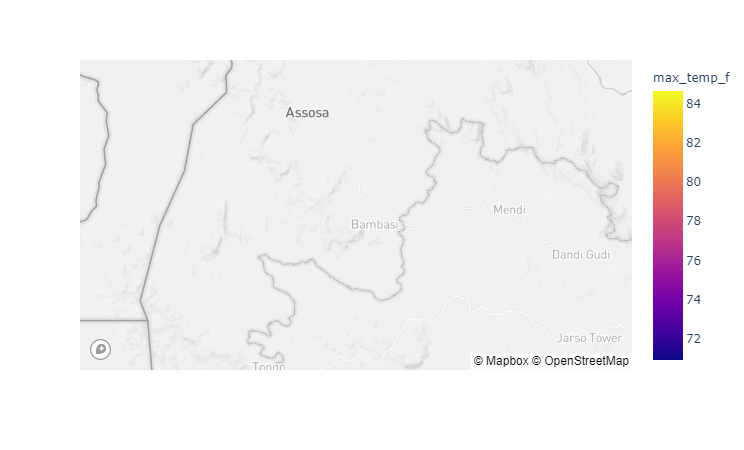

In [31]:
fig = px.scatter_mapbox(merged_df, lat="Lat", lon="Lng", color="max_temp_f", hover_data=[
    "City",
    "Country",
    "Lat",
    "Lng",
    "Hotel Name",
    "Humidity"
])

fig.show()
